In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=200): return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('male cardinal', max_images=1)

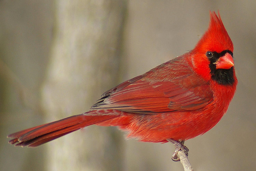

In [4]:
from fastdownload import download_url
dest = 'male-cardinal.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

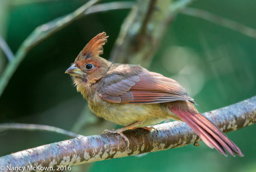

In [6]:
download_url(search_images('female cardinal', max_images=1)[0], 'female-cardinal.jpg', show_progress=False)
Image.open('female-cardinal.jpg').to_thumb(256,256)

In [7]:
searches = 'male cardinal','female cardinal'
path = Path('cardinals')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

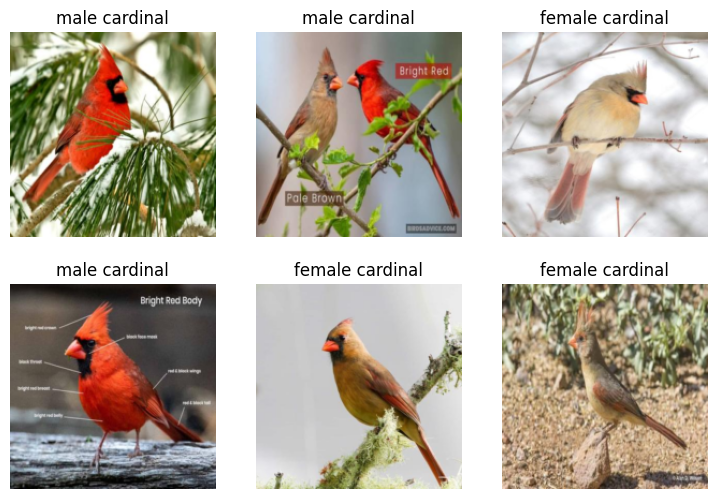

In [40]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [28]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.726407,0.215476,0.063107,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.267602,0.206729,0.058252,00:02
1,0.212411,0.188908,0.043689,00:01
2,0.151190,0.209732,0.048544,00:01


In [37]:
def cardinals(c):
  match c:
    case "female cardinal":
      return 0
    case "male cardinal":
      return 1

In [44]:
is_sex,_,probs = learn.predict(PILImage.create('male-cardinal.jpg'))
print(f"This is a: {is_sex}.")
print(f"Probability it's a {is_sex}: {probs[cardinals(is_sex)]:.4f}")

This is a: male cardinal.
Probability it's a male cardinal: 0.9999
